In [19]:
%alias Notung java -jar /home/catalin/Downloads/Notung-2.9.jar
%alias PhyML /home/catalin/Downloads/PhyML-3.1_linux64

from Bio import SeqIO
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import os

In [20]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('colheader_justify', 'left')
#d.style.set_properties(**{'text-align': 'left'})

In [6]:
ls proteomes/

Candidatus_Heimdallarchaeota.fasta*    Lokiarchaeum.fasta*
Candidatus_Odinarchaeota_LCB_4.fasta*  Thorarchaeota_archaeon_AB_25.fasta*
Lokiarchaeota_archaeon_CR_4.fasta*     Thorarchaeota_SMTZ-45.fasta*


In [22]:
ls outgroup/

Bathyarchaeota-archaeon.fasta*  Metallosphaera-yellowstonensis.fasta*
Crenarchaeota-archaeon.fasta*


In [21]:
cat proteomes/* > alltaxa.fasta

In [60]:
cat outgroup/* >> alltaxa.fasta

In [79]:
!head Orthogroups.txt -n 2

OG0000000: KKK40223.1 KKK40226.1 KKK40341.1 KKK40369.1 KKK40453.1 KKK40454.1 KKK40457.1 KKK40672.1 KKK40831.1 KKK40851.1 KKK41091.1 KKK41097.1 KKK41155.1 KKK41182.1 KKK41219.1 KKK41852.1 KKK41853.1 KKK41975.1 KKK42155.1 KKK42259.1 KKK42368.1 KKK42474.1 KKK42607.1 KKK42609.1 KKK42647.1 KKK42824.1 KKK42845.1 KKK42847.1 KKK42849.1 KKK42857.1 KKK42860.1 KKK43026.1 KKK43031.1 KKK43373.1 KKK43455.1 KKK43456.1 KKK43498.1 KKK43967.1 KKK44032.1 KKK44068.1 KKK44114.1 KKK44255.1 KKK44343.1 KKK44406.1 KKK44444.1 KKK44492.1 KKK44552.1 KKK44703.1 KKK44706.1 KKK44775.1 KKK44939.1 KKK45081.1 KKK45140.1 KKK45196.1 KKK45299.1 KKK45421.1 KKK45512.1 KKK46057.1 KKK46087.1 KKK46108.1 KKK46109.1 KKK46113.1 KKK46288.1 KKK46293.1 KKK46406.1 KKK46410.1 KKK46541.1 KXH69871.1 KXH70892.1 KXH72051.1 KXH72871.1 KXH73274.1 KXH73278.1 KXH74422.1 KXH76323.1 KXH76619.1 KXH77151.1 MBS85073.1 MBS85200.1 OLS12066.1 OLS12284.1 OLS12298.1 OLS12323.1 OLS12338.1 OLS12375.1 OLS12668.1 OLS12906.1 OLS12963.1 OLS12966.1 OLS12978.1

In [77]:
print(orthogroups[1])

['EHP68484.1', 'EHP68497.1', 'EHP68619.1', 'EHP69752.1', 'EHP69892.1', 'EHP70836.1', 'KKK40121.1', 'KKK40340.1', 'KKK40555.1', 'KKK40586.1', 'KKK41180.1', 'KKK41322.1', 'KKK41400.1', 'KKK41567.1', 'KKK41687.1', 'KKK41743.1', 'KKK41886.1', 'KKK42050.1', 'KKK42258.1', 'KKK42416.1', 'KKK42417.1', 'KKK42616.1', 'KKK42617.1', 'KKK42843.1', 'KKK43315.1', 'KKK43668.1', 'KKK43680.1', 'KKK44003.1', 'KKK44140.1', 'KKK44683.1', 'KKK45020.1', 'KKK45021.1', 'KKK45189.1', 'KKK45190.1', 'KKK45191.1', 'KKK45651.1', 'KKK45767.1', 'KKK46020.1', 'KKK46067.1', 'KKK46128.1', 'KKK46225.1', 'KKK46536.1', 'KON31669.1', 'KXH69804.1', 'KXH69876.1', 'KXH69988.1', 'KXH70523.1', 'KXH75986.1', 'KXH76053.1', 'KXH76436.1', 'KXH77038.1', 'MBS85019.1', 'MBS85071.1', 'MBS85613.1', 'MBS85637.1', 'MBS85671.1', 'MBS85793.1', 'MBS85881.1', 'MBS86018.1', 'MBS86284.1', 'OLS12377.1', 'OLS12807.1', 'OLS12835.1', 'OLS13090.1', 'OLS13801.1', 'OLS13802.1', 'OLS14127.1', 'OLS14410.1', 'OLS14689.1', 'OLS15375.1', 'OLS15702.1', 'OLS1

In [155]:
cat Orthogroups.txt | grep "OG" | wc -l

10954


In [137]:
t=open("Orthogroups.txt").read()
x="".join(t.split("\n")).split()
orthogroups=list(map(lambda x:"".join(x.split("\n")[:-1]).split(), t.split(":")[1:]))
print(len(orthogroups),"orthogroups in total")

10954 orthogroups in total


In [185]:
print(sum(np.array(list(map(len,orthogroups)))>1), "orthogroups with more than one protein")

2809 orthogroups with more than one protein


In [189]:
print(sum(np.array(list(map(len,orthogroups)))==9), "orthogroups with exactly 9 proteins")

136 orthogroups with exactly 9 proteins


In [197]:
# good orthogroups containing 9 elements and all 7 unique 3-letter seqids.
# 2 pairs of the selected species have the same 3-letter identifier at the 
# beggining of the sequences, so 7 is the max number of different 3-letter ids in an orthogroup.
# some of these good ids will contain orthogroups from less than 9 species

goodids=[i for i in range(len(orthogroups)) if len(orthogroups[i])==9 
                                           and len(set([p[:3] for p in orthogroups[i]]))>6]
print(goodids)

[390, 391, 394, 395, 400, 403, 408, 411, 412, 413, 416, 417, 418, 421, 422, 427, 428, 430, 431, 433, 434, 437, 438, 441, 443, 448, 449, 450, 451, 454, 459, 462, 464, 465, 467, 468, 471, 476, 485, 487, 488, 489, 491, 492, 493, 495]


In [188]:
len(goodids)

46

In [ ]:
# after finding these orthogroups, I realised that Orthofinder outputs SingleCopyOrthogroups.txt,
# which contains just the correct 38 orthogroups with exactly one protein from each species.

In [221]:
def parse(orthogroup):
    i=10
    names=[]
    idsset=[]
    f=open("OGfastas/orthogroup"+str(ogindex)+".fasta","w+")
    for ID in orthogroup:
        seqs=SeqIO.parse("alltaxa.fasta","fasta")
        for s in seqs:
            if s.id==ID:
                f.write(">"+s.description+"\n"+str(s.seq)+"\n")
                names+=[s.description[:6]+s.description[-4:-1].replace(" ","-")]
                idsset+=[s.description]
                i+=1
    species=len(set(map(lambda x:x.split("[")[-1], idsset)))
    print(len(orthogroup),"proteins from",species, "species in orthogroup number",ogindex)
    d=pd.DataFrame([[i[:11]," ".join(i.split('[')[:-1])[11:],i.split('[')[-1][:-1]] for i in idsset],columns=["id","protein","species"])
    f.close()
    return d.sort_values(by=["protein","species"])

# Visualize the protein alignments of these orthogroups by adding the sequences to a fasta file, aligning it with MAFFT, and opening the alignment in ClustalX. For that, rerun the following cells, either iterating or manually changing $ogindex$:

In [223]:
#iterate to check all orthogroups:
i=0
ogindex=goodids[i]
i+=1

#to set manually
ogindex=395

parse(orthogroups[ogindex])

9 proteins from 8 species in orthogroup number 395


,id,protein,species
7,OLS31600.1,Ribose-5-phosphate isomerase A,Candidatus Thorarchaeota archaeon AB_25
1,KKK44869.1,Ribose-5-phosphate isomerase A,Lokiarchaeum sp. GC14_75
2,KON33356.1,hypothetical protein AC479_04795,miscellaneous Crenarchaeota group-6 archaeon AD8-1
4,KXH76417.1,hypothetical protein AM326_02820,Candidatus Thorarchaeota archaeon SMTZ-45
3,KXH71619.1,hypothetical protein AM326_11665,Candidatus Thorarchaeota archaeon SMTZ-45
5,MBS85711.1,hypothetical protein CME83_04055,Candidatus Heimdallarchaeota archaeon
0,EHP69493.1,ribose 5-phosphate isomerase,Metallosphaera yellowstonensis MK1
8,PIU60182.1,ribose 5-phosphate isomerase A,Candidatus Bathyarchaeota archaeon CG07_land_8_20_14_0_80_47_9
6,OLS13299.1,ribose-5-phosphate isomerase A,Candidatus Lokiarchaeota archaeon CR_4


In [176]:
ogindexfasta=str(ogindex)+".fasta"
!mafft --genafpair --quiet --maxiterate 10000 OGfastas/orthogroup$ogindexfasta > OGfastas/aligned$ogindexfasta
!clustalx OGfastas/aligned$ogindexfasta

Sequence format is Pearson
Sequence 1: EHP69493.1   250 aa
Sequence 2: KKK44869.1   250 aa
Sequence 3: KON33356.1   250 aa
Sequence 4: KXH71619.1   250 aa
Sequence 5: KXH76417.1   250 aa
Sequence 6: MBS85711.1   250 aa
Sequence 7: OLS13299.1   250 aa
Sequence 8: OLS31600.1   250 aa
Sequence 9: PIU60182.1   250 aa
Sequence format is Pearson
Sequences assumed to be PROTEIN


In [249]:
d={}
# These orthogroups have exactly one sequence from each organism
# and their alignments look good.
# To reconstrunct the species tree, we concatenate them:
bestogs=[390,403,416,417,418,421] 
for best in bestogs:
    for seqid in orthogroups[best]:
        seqs=SeqIO.parse("alltaxa.fasta","fasta")
        for s in seqs:
            if s.id==seqid:
                species=s.description.split("[")[-1]
                try: d[species]+=str(s.seq)
                except KeyError:
                    d[species]=str(s.seq)

In [270]:
#Renaming for PHYLIP format, indicating if the species belongs to the Ingroup or Outgroup:

names=dict(zip(d.keys(), #run only when d contains all 9 species
["Metallo-O","Lokiarc-I","Crenarc-O","ThorSMT-I","Heimdal-I","C.-Loki-I","C.-Odin-I","ThorAB2-I","C.Bathy-O"]))
names

{'Candidatus Bathyarchaeota archaeon CG07_land_8_20_14_0_80_47_9]': 'C.Bathy-O',
 'Candidatus Heimdallarchaeota archaeon]': 'Heimdal-I',
 'Candidatus Lokiarchaeota archaeon CR_4]': 'C.-Loki-I',
 'Candidatus Odinarchaeota archaeon LCB_4]': 'C.-Odin-I',
 'Candidatus Thorarchaeota archaeon AB_25]': 'ThorAB2-I',
 'Candidatus Thorarchaeota archaeon SMTZ-45]': 'ThorSMT-I',
 'Lokiarchaeum sp. GC14_75]': 'Lokiarc-I',
 'Metallosphaera yellowstonensis MK1]': 'Metallo-O',
 'miscellaneous Crenarchaeota group-6 archaeon AD8-1]': 'Crenarc-O'}

In [251]:
f=open("OGfastas/concatenatedforspecies.fasta","w+")
for i in d:
    f.write(">"+names[i]+"\n"+d[i]+"\n")
f.close()
!cat OGfastas/concatenatedforspecies.fasta

>Metallo-O
MVSSHRCSFCGTEIPPGTGMMYVKNDGTILWFCSSKCRKYMLIQRKDAKRLKWTEAYSRVRMSSRREIRWGLARIYASQNNTIITITDITGAEIISRASGGMVVKADREKPSPYAAMLAAGRAASEALDKGLMAIHIKVRAPGGAGPKTPGPGAQPAIRSLARSGFIIGRIEDVTPIPHDTIRRPGGRRGRRVMRVLEYDERRNYLRLYVEDEDDLWLLHTILTKGDVVIARTTRDVSMGNESRRIPMTIQLRVEFTEFQSYTGRLRIHGIVEDAPEKFGIKGSHHTINLDLGEEIVIVKPWTKAQLERIEREARKRSKNMIVLVDQDELLIAIPMEQGIKILVERALQGINEQTESLEDVAKDVAEEITQFANQYQPEALILAGPGPFKEIVKDMLRVKARIYVDSVSTASRAGLAEILKRDIIDQVMRDYSISKSTKQLERALGLMARDSGLVVYGLEETREASTYGAVETLLVSEDLITDDEKRSVIEEVMNLVESKGGNVMIVPKDSPVYHQLKALSGIIGILRFRYKMTSLKYVIKLTFEVEGSVDKPDVIGAIFGQTENLFGQEFDLRELQDKGRLGRIVVEMKTKGGKSEGYIEIPSNLDKVETALIASMVESVEKVGPYNAKFVLKEIEDVRAEKLKKIIERAKEILATWTREKNLDIKEVMNEISGAVKTGELIEFGPDRLPAGPDVYSDPNLIIVEGRADIINLLRYGYRNTVAVEGASGKIQQSVVDLAKTKKTVIAFLDGDHGGDLILKELLNSNVKIDYVARAPVGREVEELTGKEIAKALSNMIPLTQYLKKQQEVLASPQRMEEAQSQQAVQLVEQPKKEIEIQIPQAAIEEIKKLPGTLEGIIFDENWRPVEKVQVRDIISKLENMSNGNVSFIVFDGVITQRLLELASSKNVKMIVGVRIGGINKKPENVKILTLSDVIGLMLEGIRDAVRKFLGGTTSYDVAVDEFIKDLQKALISSDVQVKLVFSLTNKI

In [268]:
!mafft --genafpair --quiet --maxiterate 10000 OGfastas/concatenatedforspecies.fasta > OGfastas/alignedconcatenatedforspecies.fasta

In [260]:
!seqret -auto -sprotein1 -sequence fasta::OGfastas/alignedconcatenatedforspecies.fasta -outseq phylip::OGfastas/alignedconcatenatedforspecies.phy

In [261]:
!cat OGfastas/alignedconcatenatedforspecies.phy

 9 1878
Metallo-O MVSSHRCSFC GTEIPPGTGM MYVK-NDGTI LWFCSSKCRK YMLIQRKDAK
Lokiarc-I MVKVKKCSFC GWDIPIGRGM MYIK-KDGTI FNFCTKKCRK ALIVYKKKAR
Crenarc-O MPKPKKCSFC GNDFPSGKGM IYVK-NDGTL LWFCSSKCRK SSLNFKRDSR
ThorSMT-I MVGTQRCVFC EKDIEPGTGL AFVQTKDGSV LWFCSNKCKV ARLKRRMKPR
Heimdal-I MIRDYECSFC GKDIDRGTGM MYVK-LDGSI LRFCSKKCRI SQVNHKRNPR
C.-Loki-I MVKSRNCDFC GKPIQPGKGT IYVK-NDGIV WNFCTRRCRV LKIRYKKNPR
C.-Odin-I M-RIFKCSFC GDDIQVGKGL TYFK-IDGTP LHFCSSKCKK SLLLYNRKPR
ThorAB2-I MVGTQRCSFC GKDIEPGTGS AFVQTKDGAV FWFCSNKCKV NRLKRRMKPR
C.Bathy-O MPRPRKCSFC GNDFPAGTGM MYVK-NDGSI LWFCSSKCRK SS-KFGRDAR

          RLKWTEAYSR V--------- ----RMS--- ---------- ----------
          KTRWTAHYGK E--------- -----MS--- ---------- ----------
          KFKWTTYFGK EEKG------ ---KGMS--- ---------- ----------
          ATKWTKGFQK GGK------- ---AKMS--- ---------- ----------
          KLKWTTKYER K--------- ----YMSE-- EEIKTEQMEP EITEEVIDTQ
          KAPWTKFYKQ G--------- -----MQ--- ---------- ----------
          RVKWTK

In [265]:
!clustalx OGfastas/alignedconcatenatedforspecies.fasta

Sequence format is Pearson
Sequence 1: Metallo-O   1878 aa
Sequence 2: Lokiarc-I   1878 aa
Sequence 3: Crenarc-O   1878 aa
Sequence 4: ThorSMT-I   1878 aa
Sequence 5: Heimdal-I   1878 aa
Sequence 6: C.-Loki-I   1878 aa
Sequence 7: C.-Odin-I   1878 aa
Sequence 8: ThorAB2-I   1878 aa
Sequence 9: C.Bathy-O   1878 aa
Sequence format is Pearson
Sequences assumed to be PROTEIN


In [266]:
%PhyML -i OGfastas/alignedconcatenatedforspecies.phy -d aa -s BEST







                                 ..........................                                      
 ooooooooooooooooooooooooooooo        CURRENT SETTINGS        ooooooooooooooooooooooooooooooooooo
                                 ..........................                                      

                . Sequence filename:				 alignedconcatenatedforspecies.phy
                . Data type:					 aa
                . Alphabet size:				 20
                . Sequence format:				 interleaved
                . Number of data sets:				 1
                . Nb of bootstrapped data sets:			 0
                . Compute approximate likelihood ratio test:	 yes (SH-like branch supports)
                . Model name:					 LG
                . Proportion of invariable sites:		 0.000000
                . Number of subst. rate categs:			 4
                . Gamma distribution parameter:			 estimated
                . 'Middle' of each rate class:			 mean
                . Amino acid equilibri

In [271]:
Notung -g OGfastas/alignedconcatenatedforspecies.phy_phyml_tree.txt

2	1
2	2


### Outgroup rooting with the 6 concatenated sequences was successful:

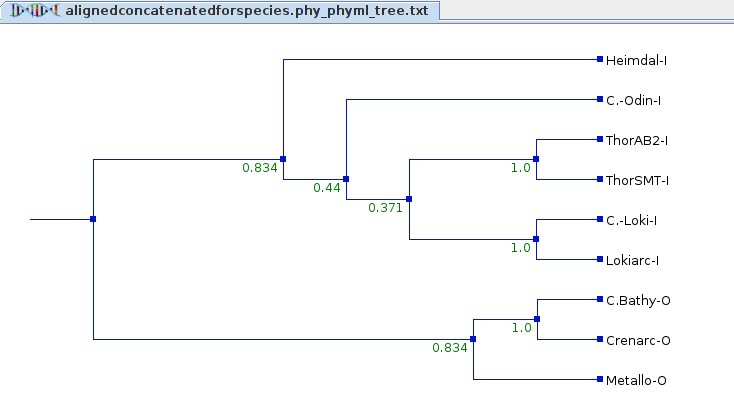

In [316]:
og=395
filename="orthogroup"+str(og)

d={}
for seqid in orthogroups[og]:
        seqs=SeqIO.parse("alltaxa.fasta","fasta")
        for s in seqs:
            if s.id==seqid:
                species=s.description.split("[")[-1]
                
                d[species+seqid]=str(s.seq)
f=open("OGfastas/"+filename+".fasta","w+")
for i in d:
    f.write(">"+names[i[:-10]]+i[-10:]+"\n"+d[i]+"\n")
f.close()

In [324]:
phynames=dict([[i[-10:],i[:-10]] for i in list(d.keys())])
phynames

{'EHP69493.1': 'Metallosphaera yellowstonensis MK1]',
 'KKK44869.1': 'Lokiarchaeum sp. GC14_75]',
 'KON33356.1': 'miscellaneous Crenarchaeota group-6 archaeon AD8-1]',
 'KXH71619.1': 'Candidatus Thorarchaeota archaeon SMTZ-45]',
 'KXH76417.1': 'Candidatus Thorarchaeota archaeon SMTZ-45]',
 'MBS85711.1': 'Candidatus Heimdallarchaeota archaeon]',
 'OLS13299.1': 'Candidatus Lokiarchaeota archaeon CR_4]',
 'OLS31600.1': 'Candidatus Thorarchaeota archaeon AB_25]',
 'PIU60182.1': 'Candidatus Bathyarchaeota archaeon CG07_land_8_20_14_0_80_47_9]'}

In [321]:
list(d.keys())

['Metallosphaera yellowstonensis MK1]EHP69493.1',
 'Lokiarchaeum sp. GC14_75]KKK44869.1',
 'miscellaneous Crenarchaeota group-6 archaeon AD8-1]KON33356.1',
 'Candidatus Thorarchaeota archaeon SMTZ-45]KXH71619.1',
 'Candidatus Thorarchaeota archaeon SMTZ-45]KXH76417.1',
 'Candidatus Heimdallarchaeota archaeon]MBS85711.1',
 'Candidatus Lokiarchaeota archaeon CR_4]OLS13299.1',
 'Candidatus Thorarchaeota archaeon AB_25]OLS31600.1',
 'Candidatus Bathyarchaeota archaeon CG07_land_8_20_14_0_80_47_9]PIU60182.1']

In [317]:
cat OGfastas/orthogroup395.fasta

>Metallo-OEHP69493.1
MEDPKAIVARHALKYIGDAKLVGLGTGRTVRKLIEVLQEAGLLNGKKVVASSLDTELLIAKAFPDSVLSLVSGSIPDVYFDSFDQLVKGGNSWTLVKGGGGALLREKVLSYSSRRRVFLGEKSKLWEGRTIKVPIEVVPVALSYVLRGLENMKVVAEVREGTGKIGPVLTDNGNVVMDVVVETKDLCHLDKRLKSIPGVIETGVFCEELYDVIILGDPTGNVEIVEKSRS
>Lokiarc-IKKK44869.1
MNKLIEKGKKNAAIKAVEENVKKNMVLGIGSGSTVVYAVERIAEMNSKEKLNLKCIPTSFQSHQLIVEHDLTLVSLDQFPEIDLDIDGADEIDMDLNLIKGGGGCLVQEKIIASNSKKLVIVADFRKNSKKLGENWKKGVPVEIIPISYVPLMRKLEKLGGSPTLRMAQAKAGPVVSDNGNFILDVDFGVINNPKELNMKILTIPGVVDTGLFIDLASIAYIGKEDGNVLTLVK
>Crenarc-OKON33356.1
MDNAKKNAAKVAITHVKDKYIIGLGSGSTVAYAIKELGEKVKIEKLEIFGIPTSYQAFLLATKYGIKITTFEEHPIIDLTIDGADQIDPKLNLIKGMGAALTREKIVASASKTNIIIADKRKKVTCLGIHDHPVPVEVIPFALTQVENQIKKIGGKTVLRKGTGKVGPVITDNGNVILDAFFGLIKNPSQLNHLLKMISGVVETGLFIDQTDLVYLGTPDQTEKIEKK
>ThorSMT-IKXH71619.1
MSRMKLNAAKSALKNIPKTGPIGLGSGSTVAIFAKELGQLVSDGKNDISVVPSSYQAYQLAIEHGIPLTNLDINPELIITVDGADEVDKNLNLTKGGGGALFQEKVVASASKRLIIIVDESKLVDKLASRFLIPIEVFPFSLSVVQRKIRTMGIEPFVRQAEKKIGPVVTDNGNFIIDLKFSKPIDDPRKVATDLKMIPGVVETGLFIDMTDEVHVGLKDG

In [306]:
!gedit OGfastas/$filename\aligned.fasta

In [285]:
!mafft --genafpair --maxiterate 10000 OGfastas/$filename\.fasta > OGfastas/$filename\aligned.fasta
!clustalx OGfastas/$filename\aligned.fasta
!seqret -auto -sprotein1 -sequence fasta::OGfastas/$filename\aligned.fasta -outseq phylip::OGfastas/$filename\aligned.phy
#java -jar /localdisk/software/modelgenerator/modelgenerator.jar

!gedit OGfastas/$filename\aligned.phy

%PhyML -i OGfastas/$filename\aligned.phy -d aa -s BEST
%Notung -g OGfastas/$filename\aligned.phy_phyml_tree.txt -s OGfastas/species_tree_final.ntgp --reconcile


nseq =  8
distance =  localgenaf
iterate =  16
cycle =  1
nthread = 0
lastonce = 0
done.
scoremtx = 1
charsize=128
    6 / 8

##### writing hat3
pairlocalalign (aa) Version 7.271 alg=N, model=BLOSUM62, 2.00, -0.00, -0.00, noshift, amax=0.0
0 thread(s)
minimumweight = 0.000500
nthread = 0
blosum 62 / kimura 200
sueff_global = 0.100000
Loading 'hat3' ... 
done.
done.
scoremtx = 1
charsize=128
Gap Penalty = -1.53, +0.00, +0.00
Loading 'hat2' ... done.
Constructing a UPGMA tree ... 
    0 / 8
done.

Progressive alignment ... 
STEP     7 /7 c
done.
tbfast (aa) Version 7.271 alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)
minimumweight = 0.000500
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
Loading 'hat3' ... done.
done.
scoremtx = 1
charsize=128

    0 / 8
Segment   1/  1    1- 251
STEP 003-001-0  identical.    accepted.
Converged.

done
dvtditr (aa) Version 7.271 alg=A, model=BLOSUM62,

OSError: Background processes not supported.

In [308]:
%PhyML -i OGfastas/$filename\aligned.phy -d aa -s BEST




. Check sequence 'Metallo-Oa----MEDPKA' length (expected length: 250, observed length: 240) [OTU 1].

. Type enter to exit.


In [307]:
!seqret -auto -sprotein1 -sequence fasta::OGfastas/$filename\aligned.fasta -outseq phylip::OGfastas/$filename\aligned.phy

In [304]:
orthogroups[395]

['EHP69493.1',
 'KKK44869.1',
 'KON33356.1',
 'KXH71619.1',
 'KXH76417.1',
 'MBS85711.1',
 'OLS13299.1',
 'OLS31600.1',
 'PIU60182.1']

In [303]:
t=!cat OGfastas/$filename\aligned.phy
t.split

 8 250
Metallo-Oabc ----MEDPKA IVARHAL-KY IGDAKLVGLG TGRTVRKLIE VLQEAGLLNG
Lokiarc-Iabc MNKLIEKGKK NAAIKAVEEN VKKNMVLGIG SGSTVVYAVE RIAEMNSKEK
Crenarc-Oabc ----MDNAKK NAAKVAI-TH VKDKYIIGLG SGSTVAYAIK ELGEKVKIEK
ThorSMT-Iabc ----MSNAKL NAAKSAS-KL IPKTGAIGLG SGSTVALFAE ELGKRIAAKK
Heimdal-Iabc MF--INELKK ELVLKAH-DI LAEEDLILLG AGTTVEAFIR Y-----SKNK
C.-Loki-Iabc MS--VEEAKK KAAIQAVDDY VKDKMVVGMG SGSTVVYAAQ RLAERVKKEN
ThorAB2-Iabc ----MSRVKL NAAKSAL-EK IPKTGPIGLG SGSTVAIFAK ELGQRISKGE
C.Bathy-Oabc ----METAKK NAAKEAV-RN VKDGSVVGLG SGSTAAFAIE ELGNRIKHEG

          KKV--VASSL DTELLIAKAF PDSVLSLV-S GSIPDVYFDS FDQLVKGGNS
          LNLKCIPTSF QSHQLIVE-H DLTLVSLD-Q FPEIDLDIDG ADEIDMDLN-
          LEIFGIPTSY QAFLLATK-Y GIKITTFE-E HPIIDLTIDG ADQIDPKLN-
          VNVRVVPSSY QAYQLAIE-F KIPLTNLD-L DPELELTVDG ADEVDRNLN-
          KKF--TASSN KISAEIKK-F GHNEIELDTI ERGKYVCIDG ADQIIRGNL-
          LHVKCVPTSF QSYQLCVE-Q GLPLTSLD-V NPALDVDIDG ADEIDAQLN-
          NDISVVPSSY QAYQLAVE-Y DIPLTNLD-L NPELIITVDG ADEV

In [299]:
%PhyML -i OGfastas/$filename\aligned.phy -d aa -s BEST







                                 ..........................                                      
 ooooooooooooooooooooooooooooo        CURRENT SETTINGS        ooooooooooooooooooooooooooooooooooo
                                 ..........................                                      

                . Sequence filename:				 orthogroup395aligned.phy
                . Data type:					 aa
                . Alphabet size:				 20
                . Sequence format:				 interleaved
                . Number of data sets:				 1
                . Nb of bootstrapped data sets:			 0
                . Compute approximate likelihood ratio test:	 yes (SH-like branch supports)
                . Model name:					 LG
                . Proportion of invariable sites:		 0.000000
                . Number of subst. rate categs:			 4
                . Gamma distribution parameter:			 estimated
                . 'Middle' of each rate class:			 mean
                . Amino acid equilibrium freque

In [309]:
%Notung -g OGfastas/$filename\aligned.phy_phyml_tree.txt -s OGfastas/species_tree_final.ntg

4	1
4	2
4	3
4	4

| **************************
| * Error when parsing tree:
| * The tree file format is incorrect.
| **************************


In [292]:
%PhyML -i OGfastas/$filename\aligned.phy -d aa -s BEST







                                 ..........................                                      
 ooooooooooooooooooooooooooooo        CURRENT SETTINGS        ooooooooooooooooooooooooooooooooooo
                                 ..........................                                      

                . Sequence filename:				 orthogroup395aligned.phy
                . Data type:					 aa
                . Alphabet size:				 20
                . Sequence format:				 interleaved
                . Number of data sets:				 1
                . Nb of bootstrapped data sets:			 0
                . Compute approximate likelihood ratio test:	 yes (SH-like branch supports)
                . Model name:					 LG
                . Proportion of invariable sites:		 0.000000
                . Number of subst. rate categs:			 4
                . Gamma distribution parameter:			 estimated
                . 'Middle' of each rate class:			 mean
                . Amino acid equilibrium freque

In [273]:
ll OGfastas/

total 1144
-rw-rw-r-- 1 catalin 10897 mar 30 13:38 aligned100.fasta
-rw-rw-r-- 1 catalin  7667 mar 30 13:39 aligned110.fasta
-rw-rw-r-- 1 catalin  9638 mar 30 13:42 aligned110.phy
-rw-rw-r-- 1 catalin  8460 mar 31 01:37 aligned150.fasta
-rw-rw-r-- 1 catalin 10638 mar 31 01:39 aligned150.phy
-rw-rw-r-- 1 catalin     0 apr  1 14:37 aligned150.phy_phyml_stats.txt
-rw-rw-r-- 1 catalin     0 apr  1 14:37 aligned150.phy_phyml_tree.txt
-rw-rw-r-- 1 catalin 64600 apr  1 00:26 aligned1.fasta
-rw-rw-r-- 1 catalin   970 mar 30 14:00 aligned313.fasta
-rw-rw-r-- 1 catalin     0 mar 30 14:00 aligned314.fasta
-rw-rw-r-- 1 catalin  5690 mar 30 13:52 aligned318.fasta
-rw-rw-r-- 1 catalin  4340 mar 30 13:53 aligned320.fasta
-rw-rw-r-- 1 catalin  4290 mar 30 13:54 aligned321.fasta
-rw-rw-r-- 1 catalin  2790 mar 30 13:54 aligned323.fasta
-rw-rw-r-- 1 catalin  3513 mar 30 13:55 aligned323.phy
-rw-rw-r-- 1 catalin  2090 mar 30 14:01 aligned324.fasta
-rw-rw-r-- 1 catalin  2551 mar 30 14:02 aligned324.phy
-rw

In [ ]:
%PhyML -i OGfastas/alignedphy -d aa -s BEST

In [ ]:
phymltreefile=alignedphy+"_phyml_tree.txt"

In [ ]:
Notung -g OGfastas/alignedconcatenatedforspecies.phy_phyml_tree.txt